In [360]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium import plugins
from folium import FeatureGroup
from folium.folium import Map
from folium.map import Tooltip


#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import branca
import html
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
print('Main Libraries imported.')

Main Libraries imported.


In [284]:
suelos_peru =r's2_peru.geojson'


In [285]:
with open('s2_peru.geojson',"r") as j:
    mydata=json.load(j)
print(mydata)

{'type': 'FeatureCollection', 'name': 's2_peru', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'Muestra': 'MS001', 'Codigo_estandar': 'JU25GL04', 'UTM_E': 433000.0, 'UTM_N': 8715000.0, 'Zona': 18, 'Region': 'JunÃ\xadn', 'Region_Hidrografica': 'Amazonas', 'Cuenca': 'Cuenca Mantaro', 'Au_ppm': 0.0, 'Hg_ppb': 85.9, 'Ag_ppm': 0.779644585, 'Al_pct': 6.157344094, 'As_ppm': 22.14267, 'Ba_ppm': 223.4628, 'Bi_ppm': 0.0, 'Ca_pct': 0.413884692, 'Cd_ppm': 0.0, 'Co_ppm': 17.201376, 'Cr_ppm': 56.593632, 'Cu_ppm': 45.9015961, 'Fe_pct': 3.585493968, 'K_pct': 1.004254517, 'La_ppm': 25.63858, 'Li_ppm': 49.75432, 'Mg_pct': 0.329992305, 'Mn_pct': 0.147434452, 'Mo_ppm': 4.7838, 'Na_pct': 0.125956767, 'Ni_ppm': 36.88333, 'P_pct': 0.112627964, 'Pb_ppm': 72.8889694, 'Sb_ppm': 2.575144127, 'Sc_ppm': 0, 'Si_pct': 29.63421706, 'Rb_ppm': 66.455239, 'Sr_ppm': 167.486, 'Ti_pct': 0.51063842, 'V_ppm': 109.81014, 'Y_ppm': 28.66437, 'Zn

In [286]:
latitud=-11
longitud=-75.54

In [303]:
data=pd.read_excel('suelos_peru.xlsx')
data.head()

Muestra Codigo_estandar  Longitud  Latitud     UTM_E      UTM_N  Zona  \
0  S12W49BS01T        AQ27GL05   -71.674  -17.020  215279.6  8116261.9    19   
1  S12W49AS01T        AQ27GL05   -72.366  -16.644  780931.9  8158022.7    18   
2  S12W48DS02T        TA27GL02   -70.195  -17.972  373508.0  8012499.1    19   
3  S12W48DS01T        TA27GL02   -70.522  -17.837  338731.8  8027207.2    19   
4  S12W48CS01T        TA27GL02   -70.865  -17.720  302225.2  8039824.5    19   

     Region Region_Hidrografica                     Cuenca  ...  CaO_pct  \
0  Arequipa            Pacífico               Cuenca Tambo  ...     4.50   
1  Arequipa            Pacífico  Cuenca Quilca-Vítor-Chili  ...     6.56   
2     Tacna            Pacífico             Cuenca Caplina  ...     4.21   
3     Tacna            Pacífico                Cuenca Sama  ...     4.35   
4     Tacna            Pacífico             Cuenca Locumba  ...     4.22   

   Fe2O3_pct  K2O_pct  MgO_pct  MnO_pct  Na2O_pct  P2O5_pct  SiO2_pct  \
0       6.49     2.19     2.08     0.10      3.06      0.24     59.07   
1       6.12     2.04     2.57     0.10      3.23      0.19     60.41   
2       5.72     2.68     2.55     0.13      2.44      0.29     56.50   
3       5.30     2.29     1.88     0.13      2.73      0.27     56.73   
4       4.93     2.62     1.89     0.10      3.15      0.22     60.62   

   TiO2_pct  LOI_pct  
0      0.81     7.20  
1      0.87     3.56  
2      0.77     9.49  
3      0.69    11.57  
4      0.76     7.52  

[5 rows x 79 columns]

In [315]:
m = folium.Map(location=[latitud, longitud], zoom_start=5,control_scale = True)
locations = list(zip(data.Latitud, data.Longitud))  
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1,color = 'red').add_to(m)

m

In [316]:
style_function = lambda x: {
    'fillColor': '#00FFFFFF',
    'color': 'black',
    'weight': 0.8,
    'fillOpacity': 0
    
}

estilos=folium.GeoJson(
    suelos_peru,
    name='Información suelos',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["Au_ppm",'Cu_ppm','Mo_ppm'],
        aliases=["Oro en ppm: ",'Cobre en ppm: ', 'Molibdeno en ppm: '],
        localize=False
    )
).add_to(m) 


In [317]:

plugins.Fullscreen(position='topright').add_to(m)
draw = plugins.Draw(export=True)
minimap = plugins.MiniMap( toggle_display=True, position='topleft',zoom_level_offset=-8)
map_aero.add_child(minimap)

    
basemaps['Google Maps'].add_to(map_aero)
basemaps['Google Satellite Hybrid'].add_to(m)
basemaps['Google Terrain'].add_to(m)
folium.LayerControl().add_to(m)
m.save("map_suelos_peru.html")
m

In [318]:
data.dtypes

Muestra             object
Codigo_estandar     object
Longitud           float64
Latitud            float64
UTM_E              float64
                    ...   
Na2O_pct           float64
P2O5_pct           float64
SiO2_pct           float64
TiO2_pct           float64
LOI_pct            float64
Length: 79, dtype: object

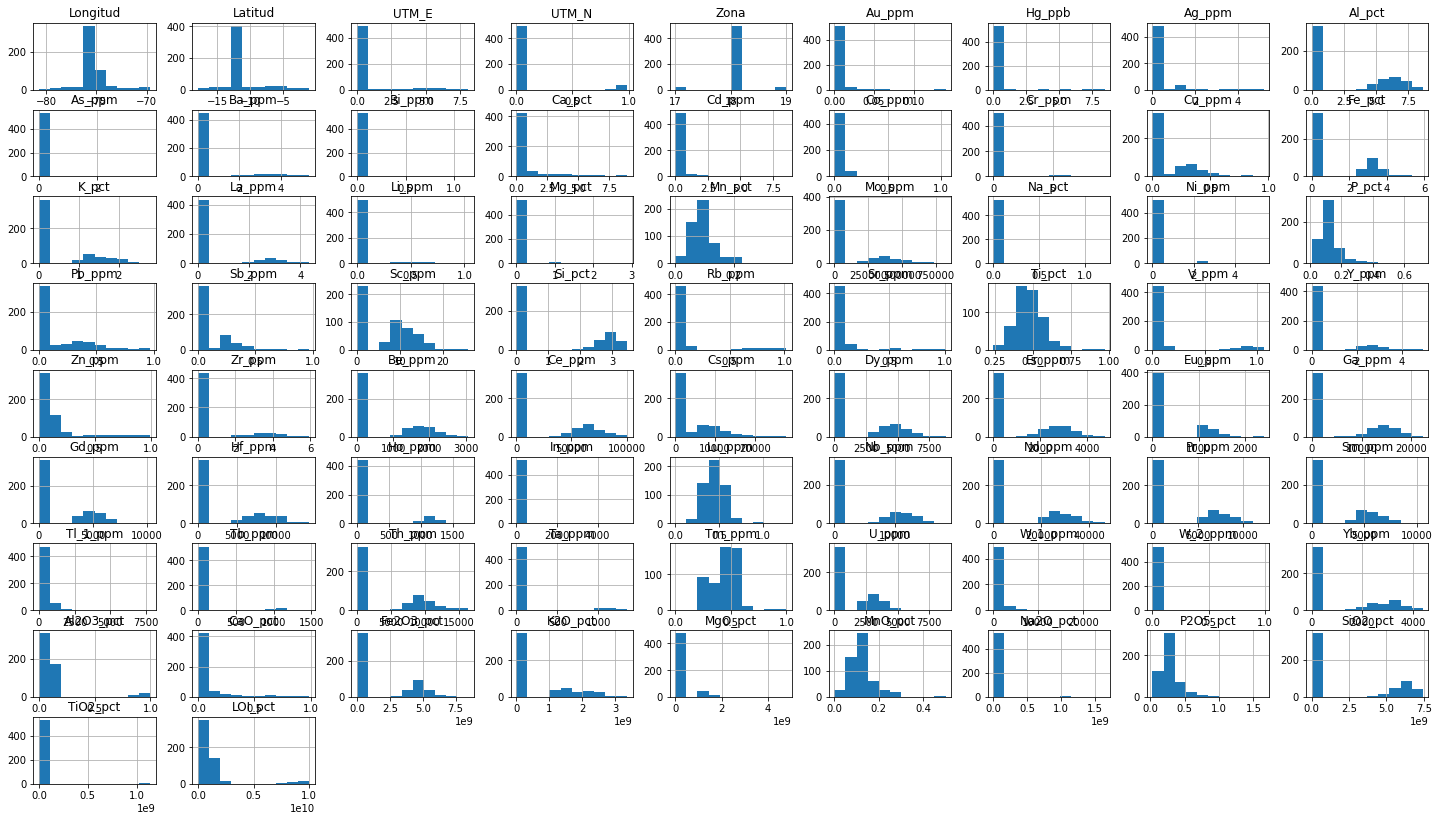

In [319]:
# Histogramas
plt.rcParams["figure.figsize"] = (25,14)
data.hist()
plt.show()

In [326]:

data.columns

Index(['Muestra', 'Codigo_estandar', 'Longitud', 'Latitud', 'UTM_E', 'UTM_N',
       'Zona', 'Region', 'Region_Hidrografica', 'Cuenca', 'Au_ppm', 'Hg_ppb',
       'Ag_ppm', 'Al_pct', 'As_ppm', 'Ba_ppm', 'Bi_ppm', 'Ca_pct', 'Cd_ppm',
       'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pct', 'K_pct', 'La_ppm', 'Li_ppm',
       'Mg_pct', 'Mn_pct', 'Mo_ppm', 'Na_pct', 'Ni_ppm', 'P_pct', 'Pb_ppm',
       'Sb_ppm', 'Sc_ppm', 'Si_pct', 'Rb_ppm', 'Sr_ppm', 'Ti_pct', 'V_ppm',
       'Y_ppm', 'Zn_ppm', 'Zr_ppm', 'Be_ppm', 'Ce_ppm', 'Cs_ppm', 'Dy_ppm',
       'Er_ppm', 'Eu_ppm', 'Ga_ppm', 'Gd_ppm', 'Hf_ppm', 'Ho_ppm', 'In_ppm',
       'Lu_ppm', 'Nb_ppm', 'Nd_ppm', 'Pr_ppm', 'Sm_ppm', 'Tl_1_ppm', 'Tb_ppm',
       'Th_ppm', 'Ta_ppm', 'Tm_ppm', 'U_ppm', 'W_1_ppm', 'W_2_ppm', 'Yb_ppm',
       'Al2O3_pct', 'CaO_pct', 'Fe2O3_pct', 'K2O_pct', 'MgO_pct', 'MnO_pct',
       'Na2O_pct', 'P2O5_pct', 'SiO2_pct', 'TiO2_pct', 'LOI_pct'],
      dtype='object')

In [327]:
columns=['Au_ppm', 'Hg_ppb',
       'Ag_ppm', 'Al_pct', 'As_ppm', 'Ba_ppm', 'Bi_ppm', 'Ca_pct', 'Cd_ppm',
       'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pct', 'K_pct', 'La_ppm', 'Li_ppm',
       'Mg_pct', 'Mn_pct', 'Mo_ppm', 'Na_pct', 'Ni_ppm', 'P_pct', 'Pb_ppm',
       'Sb_ppm', 'Sc_ppm', 'Si_pct', 'Rb_ppm', 'Sr_ppm', 'Ti_pct', 'V_ppm',
       'Y_ppm', 'Zn_ppm', 'Zr_ppm', 'Be_ppm', 'Ce_ppm', 'Cs_ppm', 'Dy_ppm',
       'Er_ppm', 'Eu_ppm', 'Ga_ppm', 'Gd_ppm', 'Hf_ppm', 'Ho_ppm', 'In_ppm',
       'Lu_ppm', 'Nb_ppm', 'Nd_ppm', 'Pr_ppm', 'Sm_ppm', 'Tl_1_ppm', 'Tb_ppm',
       'Th_ppm', 'Ta_ppm', 'Tm_ppm', 'U_ppm', 'W_1_ppm', 'W_2_ppm', 'Yb_ppm',
       'Al2O3_pct', 'CaO_pct', 'Fe2O3_pct', 'K2O_pct', 'MgO_pct', 'MnO_pct',
       'Na2O_pct', 'P2O5_pct', 'SiO2_pct', 'TiO2_pct', 'LOI_pct']

In [334]:
len(columns)

69

In [331]:
data[['Au_ppm','Ag_ppm','Cu_ppm','Zn_ppm','Mo_ppm']].describe()

Au_ppm        Ag_ppm        Cu_ppm        Zn_ppm         Mo_ppm
count  536.000000  5.360000e+02  5.360000e+02  5.360000e+02     536.000000
mean     0.003165  1.764307e+08  1.394794e+08  1.141555e+08  116606.102612
std      0.008886  6.366175e+08  2.028466e+08  2.180378e+08  198725.586928
min      0.000000  0.000000e+00  3.000000e+00  1.300000e+01       0.000000
25%      0.000000  0.000000e+00  2.875000e+01  1.210000e+02       0.000000
50%      0.000000  0.000000e+00  5.650000e+01  2.330000e+02       2.000000
75%      0.005448  6.824524e-01  2.883085e+08  1.449035e+08  250222.500000
max      0.140045  5.231002e+09  9.586025e+08  9.966708e+08  823411.000000

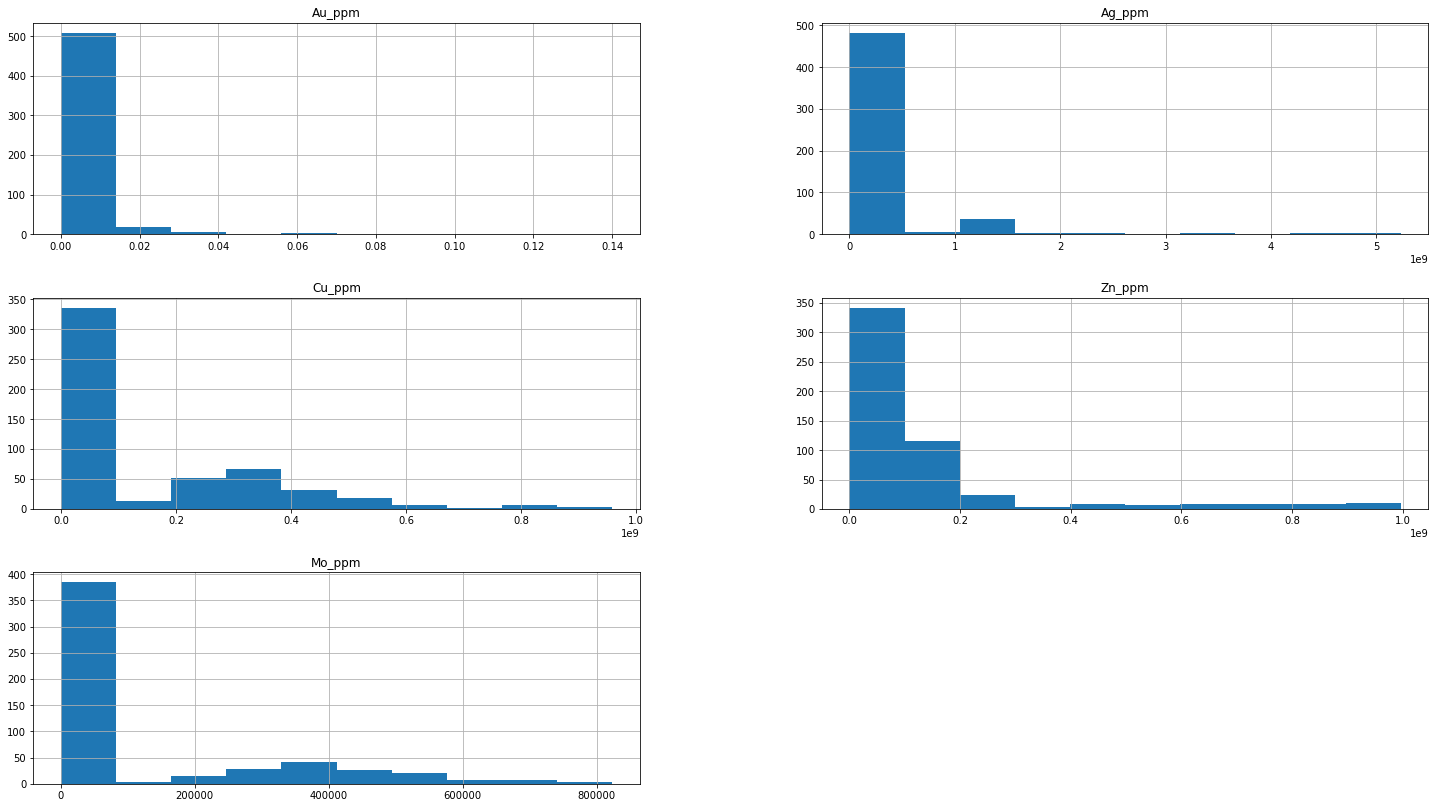

In [332]:
# Histogramas
plt.rcParams["figure.figsize"] = (25,14)
data[['Au_ppm','Ag_ppm','Cu_ppm','Zn_ppm','Mo_ppm']].hist()
plt.show()

In [333]:
data.shape

(536, 79)

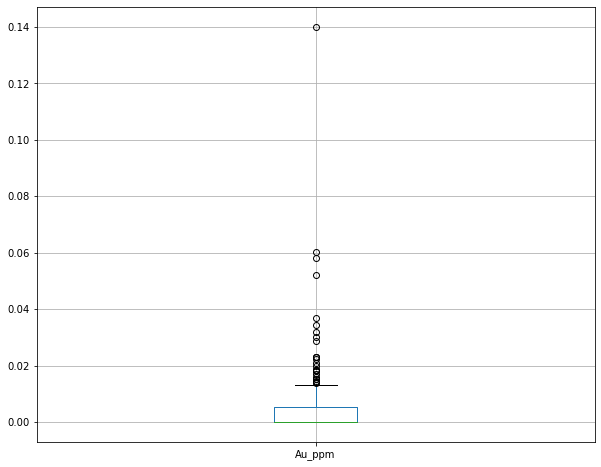

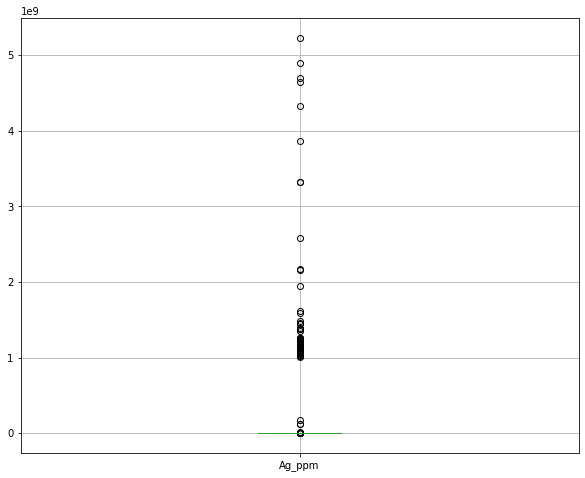

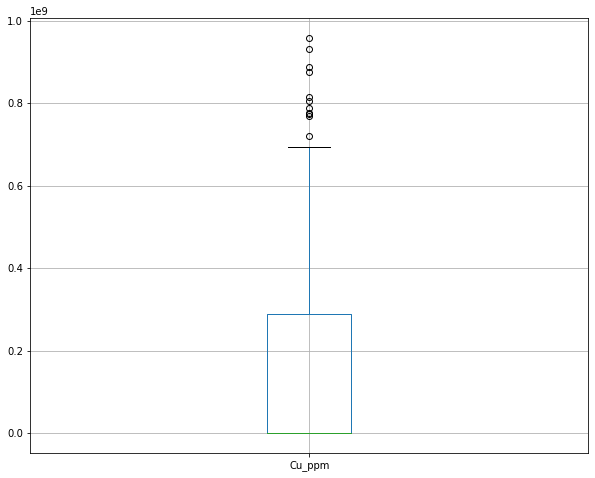

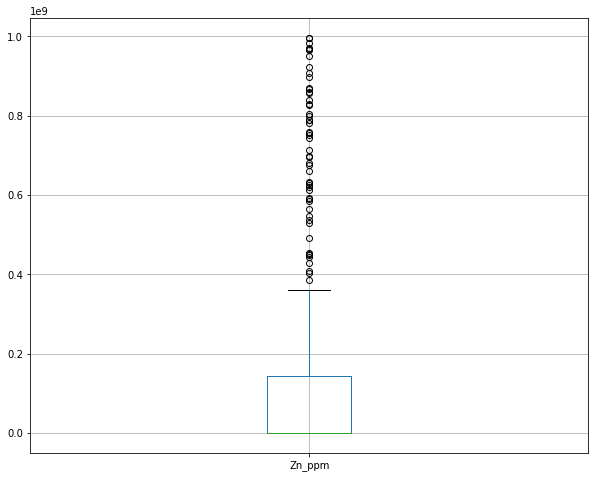

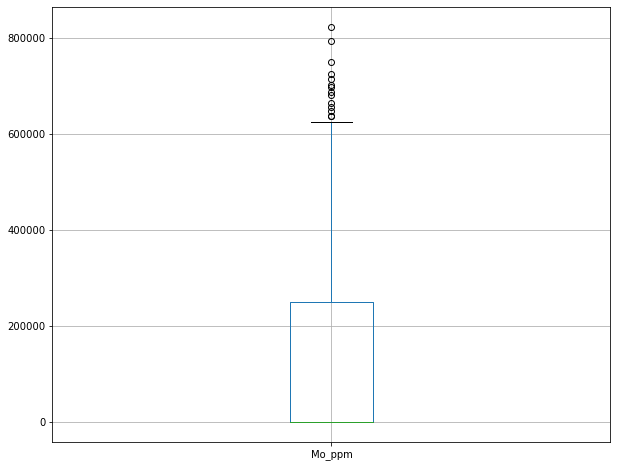

In [343]:
plt.rcParams["figure.figsize"] = (10,8)
l=['Au_ppm','Ag_ppm','Cu_ppm','Zn_ppm','Mo_ppm']
for i in l:
    data[[i]].boxplot()
    plt.show()

In [344]:
# matriz de correlación
corr_mat =data[columns].corr()


for x in range(len(columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

Au_ppm    Hg_ppb    Ag_ppm    Al_pct    As_ppm    Ba_ppm  \
Au_ppm    0.000000  0.007359  0.191449 -0.046896  0.010010  0.055058   
Hg_ppb    0.007359  0.000000 -0.024343 -0.069048 -0.005405 -0.040588   
Ag_ppm    0.191449 -0.024343  0.000000  0.252715 -0.009871  0.219068   
Al_pct   -0.046896 -0.069048  0.252715  0.000000  0.073881  0.488924   
As_ppm    0.010010 -0.005405 -0.009871  0.073881  0.000000  0.120459   
...            ...       ...       ...       ...       ...       ...   
Na2O_pct -0.009617 -0.011620 -0.034408  0.185510  0.357536  0.173013   
P2O5_pct  0.028689 -0.103319 -0.022532 -0.096330  0.031301 -0.075502   
SiO2_pct -0.026337 -0.067264  0.256507  0.837206  0.080821  0.489224   
TiO2_pct -0.034556 -0.008507  0.009105  0.140222 -0.004347 -0.028822   
LOI_pct  -0.063805 -0.040306  0.109709  0.532912  0.012846  0.284766   

            Bi_ppm    Ca_pct    Cd_ppm    Co_ppm  ...   CaO_pct  Fe2O3_pct  \
Au_ppm    0.073787  0.087992  0.204257 -0.053378  ...  0.092740  -0.009237   
Hg_ppb   -0.003794 -0.037889 -0.022328 -0.022053  ... -0.037489  -0.064430   
Ag_ppm    0.343585  0.488694  0.671234  0.140124  ...  0.533697   0.346833   
Al_pct    0.035802  0.380694  0.241605  0.242568  ...  0.386290   0.817089   
As_ppm   -0.001786 -0.002138 -0.006576 -0.012345  ...  0.025424   0.067573   
...            ...       ...       ...       ...  ...       ...        ...   
Na2O_pct -0.005725 -0.024319  0.149763 -0.031562  ...  0.010863   0.132317   
P2O5_pct -0.009492 -0.011544  0.004327  0.046114  ...  0.002427  -0.055454   
SiO2_pct  0.044096  0.370022  0.268342  0.287132  ...  0.393337   0.766708   
TiO2_pct -0.004191  0.007825 -0.024665  0.080817  ... -0.035203   0.155333   
LOI_pct   0.011260  0.101250  0.058489  0.146460  ...  0.104545   0.398247   

           K2O_pct   MgO_pct   MnO_pct  Na2O_pct  P2O5_pct  SiO2_pct  \
Au_ppm   -0.015875  0.068423  0.112848 -0.009617  0.028689 -0.026337   
Hg_ppb   -0.062059 -0.029308 -0.135958 -0.011620 -0.103319 -0.067264   
Ag_ppm    0.267690  0.406264  0.250288 -0.034408 -0.022532  0.256507   
Al_pct    0.805085  0.296096  0.019433  0.185510 -0.096330  0.837206   
As_ppm    0.094071  0.098699 -0.034976  0.357536  0.031301  0.080821   
...            ...       ...       ...       ...       ...       ...   
Na2O_pct  0.241137  0.031499 -0.030611  0.000000 -0.030077  0.167921   
P2O5_pct -0.100505  0.018830  0.233268 -0.030077  0.000000 -0.073160   
SiO2_pct  0.741922  0.254046  0.002017  0.167921 -0.073160  0.000000   
TiO2_pct  0.084367 -0.032375  0.107087 -0.012836 -0.036896  0.092612   
LOI_pct   0.532699  0.081155 -0.111126  0.163450 -0.096532  0.540804   

          TiO2_pct   LOI_pct  
Au_ppm   -0.034556 -0.063805  
Hg_ppb   -0.008507 -0.040306  
Ag_ppm    0.009105  0.109709  
Al_pct    0.140222  0.532912  
As_ppm   -0.004347  0.012846  
...            ...       ...  
Na2O_pct -0.012836  0.163450  
P2O5_pct -0.036896 -0.096532  
SiO2_pct  0.092612  0.540804  
TiO2_pct  0.000000  0.008396  
LOI_pct   0.008396  0.000000  

[69 rows x 69 columns]

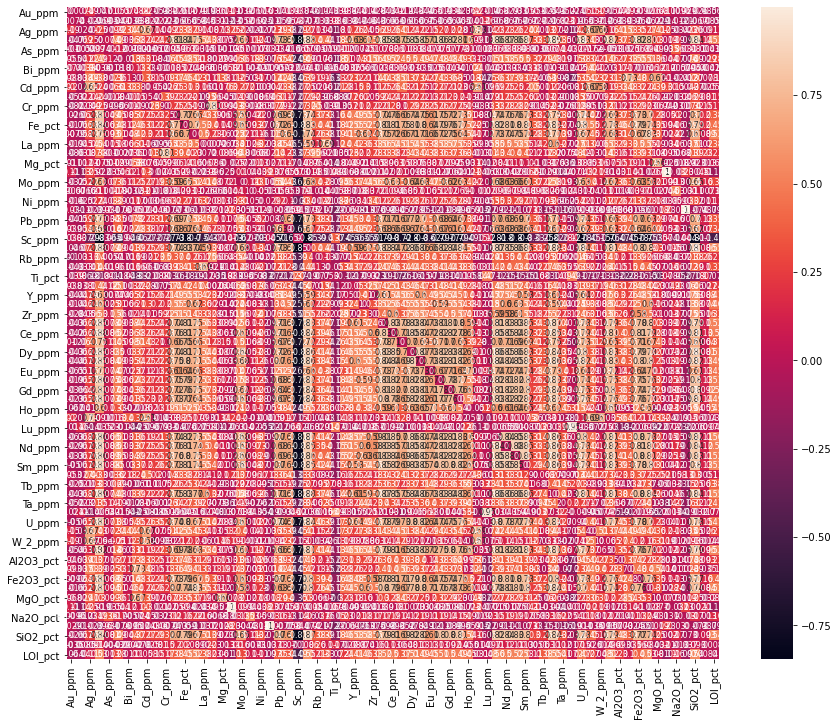

In [345]:
# Matriz de correlación
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_mat,square=True,cbar = True, annot = True, annot_kws = {'size': 8} );

In [357]:
# Máxima correlación entre variables
corr_mat.abs().idxmax()

Au_ppm        Cd_ppm
Hg_ppb        Lu_ppm
Ag_ppm        In_ppm
Al_pct        Th_ppm
As_ppm      Na2O_pct
              ...   
Na2O_pct      Na_pct
P2O5_pct       P_pct
SiO2_pct      Si_pct
TiO2_pct      Rb_ppm
LOI_pct       Nb_ppm
Length: 69, dtype: object

In [361]:
# Máxima correlacion
corr_mat.abs().max()

Au_ppm      0.204257
Hg_ppb      0.157071
Ag_ppm      0.725866
Al_pct      0.886740
As_ppm      0.357536
              ...   
Na2O_pct    0.528476
P2O5_pct    0.999410
SiO2_pct    0.873883
TiO2_pct    0.255596
LOI_pct     0.561360
Length: 69, dtype: float64

In [359]:
corr_mat.to_excel('corr_mat.xlsx', sheet_name='corr')